In [20]:
import numpy as np
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter  import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sms_data=pd.read_csv("SMSSpamCollection",encoding='latin-1',sep='\t')


In [4]:
sms_data.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [5]:
sms_data.columns

Index(['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')

In [6]:
sms_data.rename(columns={'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...':'text'},inplace=True)

In [7]:
sms_data.head()

,ham,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [8]:
sms_data.rename(columns={'ham':'Labels'},inplace=True)

In [9]:
sms_data.head()

,Labels,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [10]:
sms_data.describe()

,Labels,text
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [11]:
sms_data.groupby('Labels').describe()

text                                                               
       count unique                                                top freq
Labels                                                                     
ham     4824   4515                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [12]:
sms_data['length']=sms_data['text'].apply(len)

In [13]:
sms_data.head()

,Labels,text,length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148


<Axes: ylabel='Frequency'>

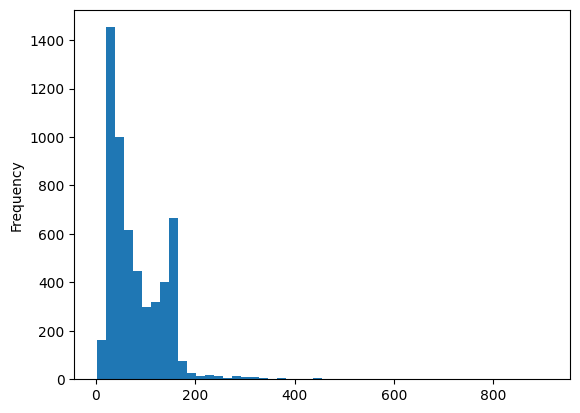

In [14]:
sms_data['length'].plot(bins=50,kind='hist')

In [15]:
import string

In [16]:
mess='The sample message! . ? ..'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
nopunc

'The sample message   '

In [17]:
nopunc.split()

['The', 'sample', 'message']

In [18]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
def text_process(message):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
sms_data['text'].apply(text_process)
sms_data.head()

,Labels,text,length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sms_data['text'])

In [27]:
len(bow_transformer.vocabulary_)

2

In [31]:
bow_transformer.get_feature_names_out()

array(['message', 'sample'], dtype=object)

In [32]:
messages_bow=bow_transformer.transform(sms_data['text'])

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [36]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [37]:
messages_tfidf.shape

(5571, 2)

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
model=MultinomialNB().fit(messages_tfidf,sms_data['Labels'])

In [43]:
model.predict(messages_bow)[0]

'ham'

In [44]:
sms_data.Labels[0]

'ham'

In [45]:
all_pred=model.predict(messages_tfidf)

In [46]:
all_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(sms_data['Labels'],all_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4824
        spam       0.00      0.00      0.00       747

    accuracy                           0.87      5571
   macro avg       0.43      0.50      0.46      5571
weighted avg       0.75      0.87      0.80      5571



C:\Users\santosh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\santosh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\santosh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [54]:
print(confusion_matrix(sms_data['Labels'],all_pred))

[[4824    0]
 [ 747    0]]
